# ImageNet Benchmark

Notes on evaluation:

* Each unique experiment can be identified by looking at the `train_kwargs` parameter.
    * Standard PyTorch sampling occurs when `{"sampler": False}`
    * Datasetq Heapq sampling occurs when `{"sampler": True}`
* Each unique experiment is conducted using a single seed (resource and time constraints) with per epoch data shuffling. 

In [1]:
import sys

sys.path.append("../")
import summary

In [2]:
metrics = [
    "loss",
    "top1_accuracy",
    "top5_accuracy",
    "time",
]

## 1. ImageNet Experiment

In [3]:
!cat imagenet.sh

#!/bin/bash

dataset="imagenet"

epochs=90
base=1431655765
test_kwargs='{"batch_size":256,"sampler":true,"steps":1,"shuffle":false}'

for (( i=0; i<5; i++ ))
do
    seed=$((base-i))

    #--- PyTorch DataLoader
    # time python imagenet.py --dataset $dataset --train-kwargs '{"batch_size": 256, "sampler": false, "shuffle": true}' --epochs $epochs --seed $seed

    # --- Datasetq BaseLoader
    time python imagenet.py --dataset $dataset --train-kwargs '{"batch_size": 256, "sampler": true, "steps": 1, "shuffle": true}' --test-kwargs $test_kwargs --epochs $epochs --seed $seed

    # --- Datasetq DataqLoader
    # time python imagenet.py --dataset $dataset --train-kwargs '{"batch_size": 256, "sampler": true, "shuffle": true}' --test-kwargs $test_kwargs --epochs $epochs --seed $seed
    # time python imagenet.py --dataset $dataset --train-kwargs '{"batch_size": 256, "sampler": true, "shuffle": true, "max_visits": 10}' --test-kwargs $test_kwargs --epochs $epochs --seed $seed
    # time pytho

In [4]:
dataset = ""
experiment_name = "imagenet_results"
csv_file = "test_result.csv"

In [5]:
results = [
    summary.get_dataframes(
        dataset=dataset,
        results=experiment_name,
        csv_file=csv_file,
    )
]

In [6]:
params, results = zip(*results)

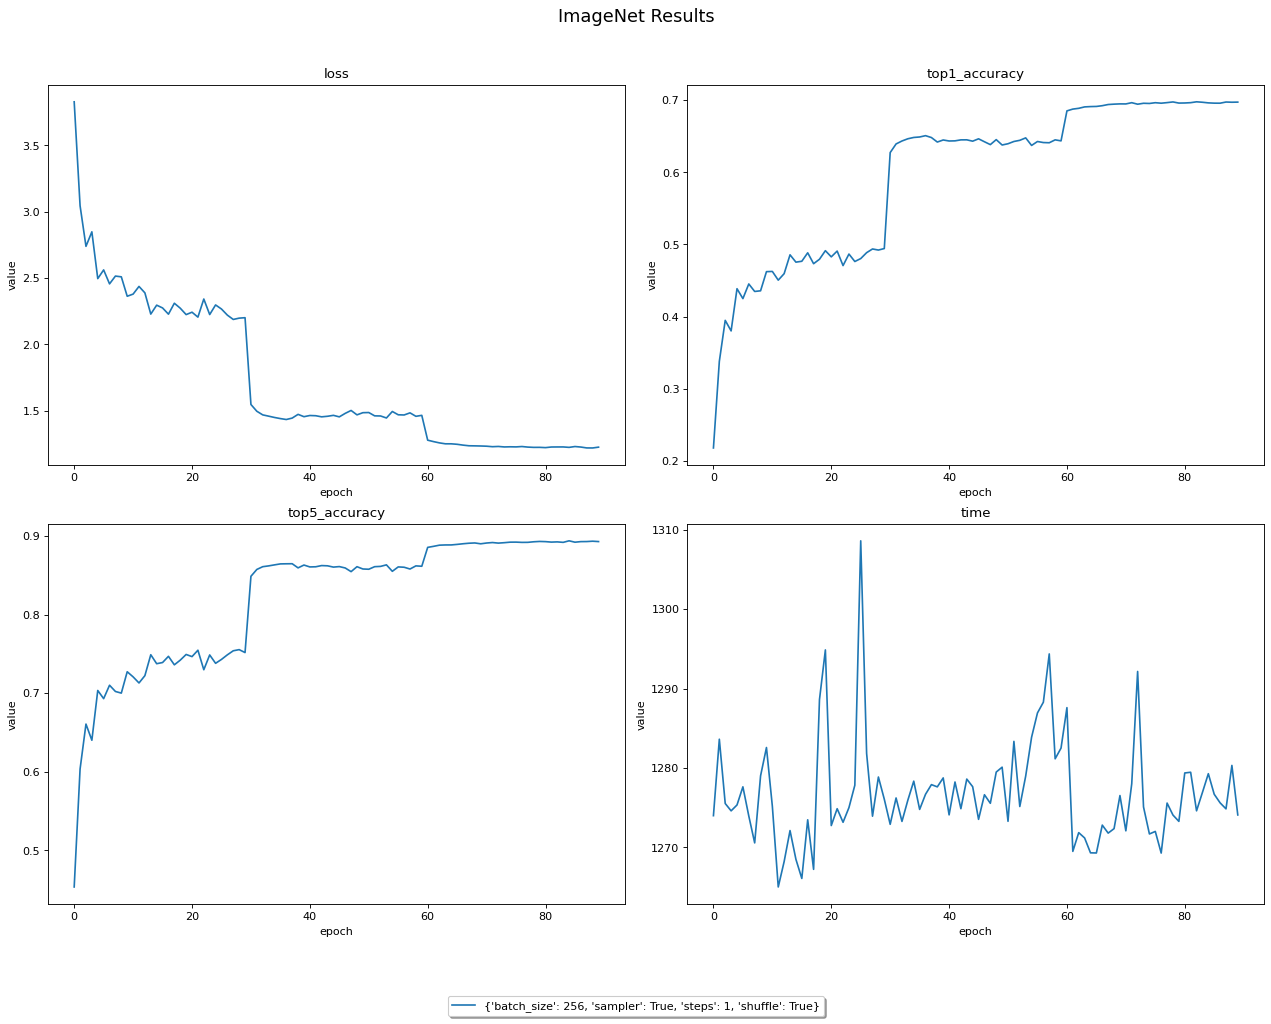

In [7]:
summary.plot_experiments_as_grid(params, results, metrics, title="ImageNet Results")

In [8]:
summary.show_experiments_at_epoch(params, results, metrics, 89)

,loss,top1_accuracy,top5_accuracy,time,batch_size,sampler,steps,shuffle
0,1.225664,0.69726,0.89312,1274.067918,256,True,1,True
